In [2]:
# jupyter nbconvert --to python test_software_dev_version.ipynb test_software_dev_version.py
%reset -f
import importlib
import numpy as np
import matplotlib.pyplot as plt
import os 

import pickle
import time
from scipy.optimize import curve_fit

import  matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import clear_output


import sys


import Alpaga # the full package
importlib.reload(Alpaga) # to make sure you have the good version
from Alpaga import alpaga as alpaga # The code that actually have the function

In [3]:
# For the tutorial: 
import Alpaga.Data_tutorial
#Dir_tuto_file = os.path.dirname(Alpaga.Data_tutorial.__file__) # where is stored to tutorial files


#For Windows users

#Be carefull!
#You have to decompose path for Windows because os.path.join function doesn't work with backslash lowercase vowel
Dir_tuto_file = os.path.join ('C:' , os.sep, 'Users\Fabien')
Dir_tuto_file = os.path.join (Dir_tuto_file, 'anaconda3\lib\site-packages\Alpaga\Data_tutorial')

WORK_DIR = Dir_tuto_file
# WORK_DIR = os.path.join(your_main_dir, second_dir)


# SAVE_DIR = '/home/lama/where_you_want_to_save_your_plots'
SAVE_DIR = '/home/glebreton/Documents/Rapport/Discussion/Presentation_ONLI_LI_Alpaga/'



# Find the files

In [3]:
directory = os.path.join(WORK_DIR, 'Single_acquisition')
prefix_file, N_iter, extention = alpaga.find_file_iter_from_dir(directory)

#For Windows users:
#prefix_file = 'Spectre'
#L_files_angles = [str(float(x*4)) for x in range(1,48)] # list string for angles
#N_iter =12 
#extention = '.dat'

print('The prefix for all the file are: "' + prefix_file + '" with ' + str(N_iter) + ' iter. The extention is: ' + extention)

I will look at file with the extention .dat in the directory C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Single_acquisition for single acquisition. The type of the files should be: prefix_iter.extention
The prefix for all the file are: "Eau_V_120sec" with 3 iter. The extention is: .dat


In [4]:
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

#For Windows users:
#prefix_file = 'Spectre'
#L_files_angles = [str(float(x*4)) for x in range(1,48)] # list string for angles
#N_iter =12 
#extention = '.dat'

print('The prefix for all the file are: "' + prefix_file + '" with ' + str(N_iter) + ' iter. The angle found are ' + str(L_files_angles) + '. The extention is: ' + extention)

I will look at file with the extention .dat in the directory C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
The prefix for all the file are: "Spectre" with 12 iter. The angle found are ['4.0', '8.0', '12.0', '16.0', '20.0', '24.0', '28.0', '32.0', '36.0', '40.0', '44.0', '48.0', '52.0', '56.0', '60.0', '64.0', '68.0', '72.0', '76.0', '80.0', '84.0', '88.0', '92.0', '96.0', '100.0', '104.0', '108.0', '112.0', '116.0', '120.0', '124.0', '128.0', '132.0', '136.0', '140.0', '144.0', '148.0', '152.0', '156.0', '160.0', '164.0', '168.0', '172.0', '176.0', '180.0', '184.0', '188.0']. The extention is: .dat


# Note for the file name construction

In [ ]:
name_out = alpaga.standard_file_name('prefixe', angle='42.0', iteration='4', extention='.dat')
print(name_out)



name_out = alpaga.standard_file_name('prefixe', angle=False, iteration='4', extention='.dat')
print(name_out)

name_out = alpaga.standard_file_name('prefixe', angle='42.0', iteration=False, extention='.dat')
print(name_out)

name_out = alpaga.standard_file_name('prefixe', angle=False, iteration=False, extention='.dat')
print(name_out)

In [ ]:
def my_own_name_file(prefixe, angle=False, iteration=False, extention='.dat'):
    '''
    Define how to built the name of a file. 
    Please note that the function structure / argument / output should be exactly like that!!!!
    '''
    if isinstance(angle, bool): # case where no angle is given 
        if isinstance(iteration, bool): # case where no iteration is given 
            name = prefixe + extention
        else: # case where an iteration is given 
            name = prefixe + '_acq' + iteration + extention
    else: # case where an angle is given 
        if isinstance(iteration, bool):  # case where no iteration is given 
            name = prefixe + '_' + angle + extention
        else:  # case where an iteration is given 
            name = prefixe + '_' + angle + '_acq' + iteration + extention
    return(name)
    
name_out = my_own_name_file('prefixe', angle='42.0', iteration='4', extention='.dat')
print(name_out)

# Cleaning and averaging

The averaging will be done for iter from 1 to 12
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_1.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_2.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_3.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_4.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_5.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_6.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_7.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_8.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_9.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_10.dat


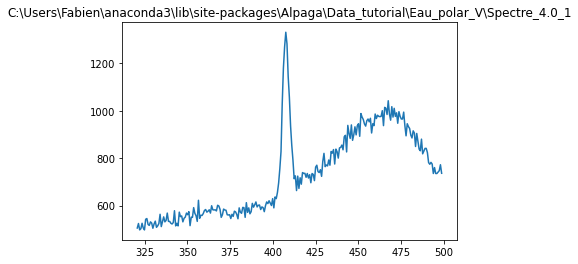

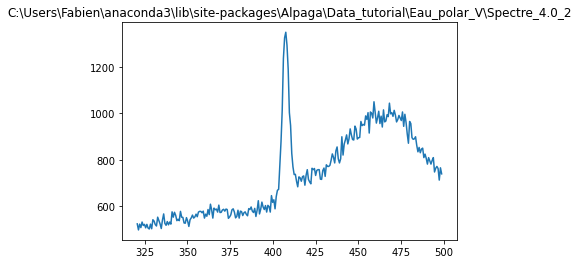

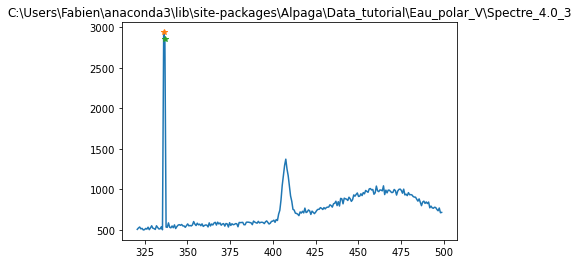

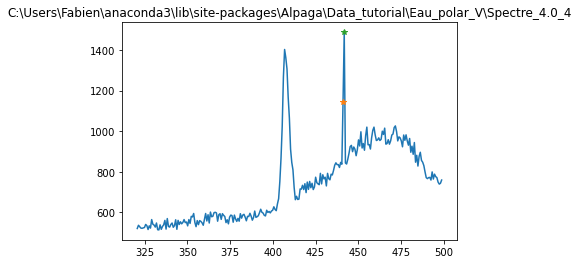

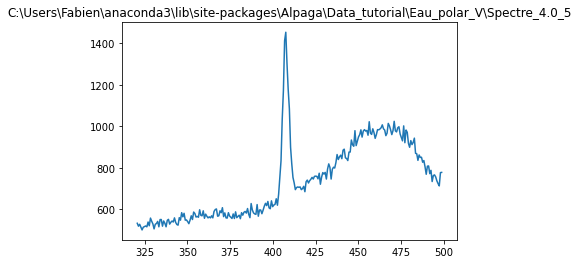

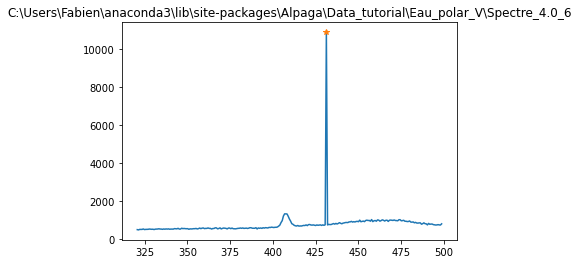

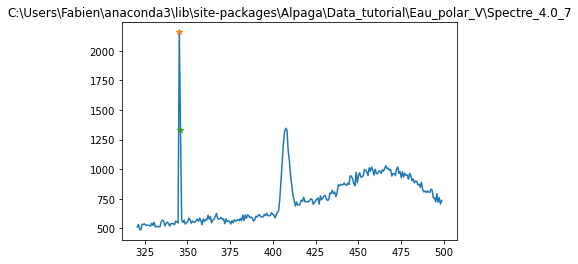

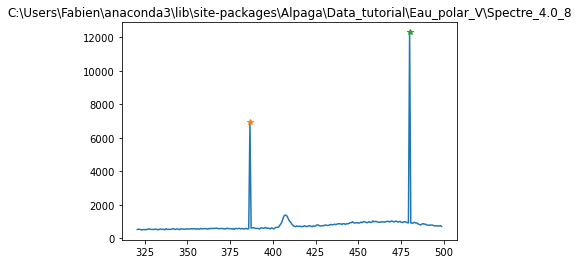

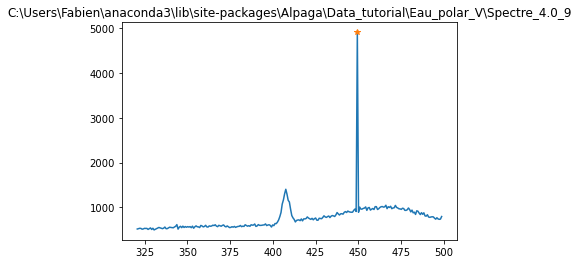

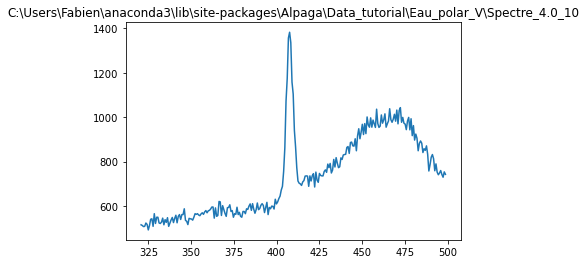

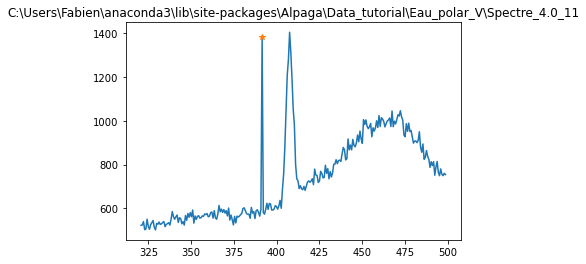

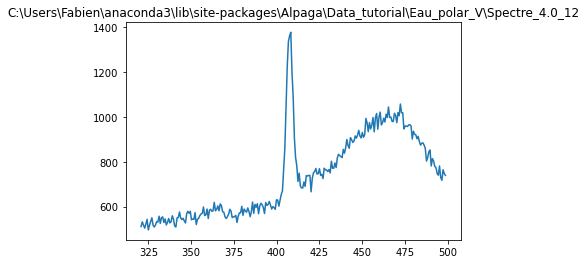

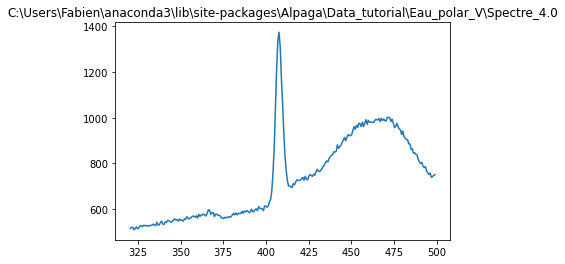

In [5]:
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
#prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

#For Windows users:
#prefix_file = 'Spectre'
#L_files_angles = [str(float(x*4)) for x in range(1,48)] # list string for angles
#N_iter =12 
#extention = '.dat'


names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names, N_iter, extention='.dat', fct_name=alpaga.standard_file_name, type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', figure_counter=1)


I will look at file with the extention .dat in the directory C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
The averaging will be done for iter within [1, 10]
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_1.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_10.dat


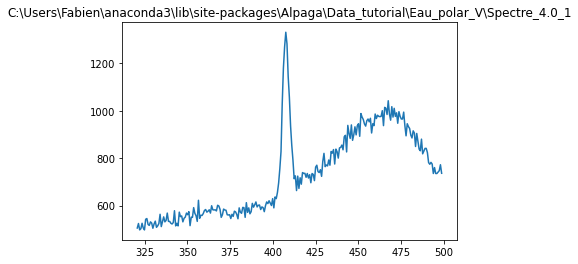

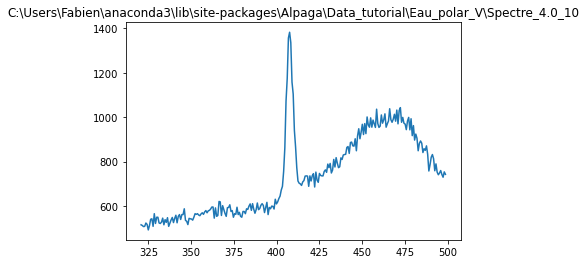

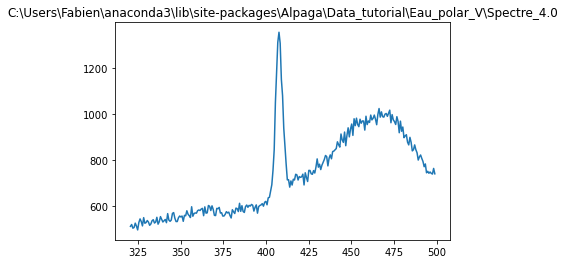

In [6]:
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

#For Windows users:
#prefix_file = 'Spectre'
#L_files_angles = [str(float(x*4)) for x in range(1,48)] # list string for angles
#N_iter =12 
#extention = '.dat'


names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0] 

N_iter = [1, 10]
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', figure_counter=1)

The averaging will be done for iter within [1, 10]
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_1.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_10.dat


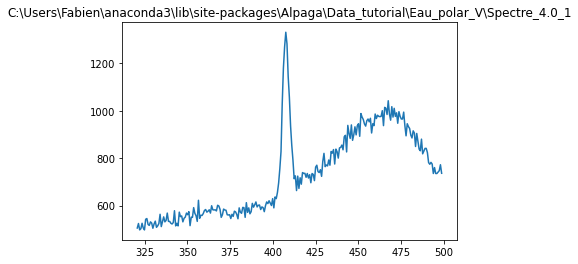

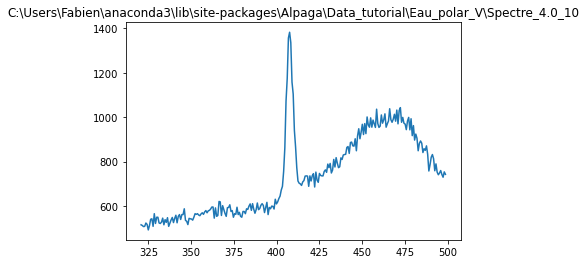

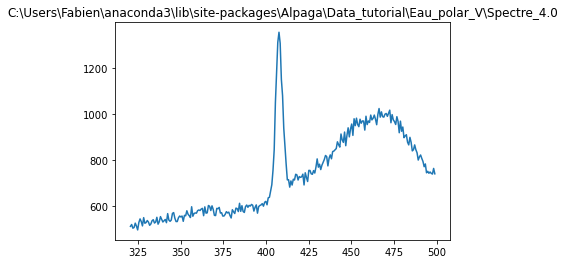

In [7]:
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
#prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

#For Windows users:
#prefix_file = 'Spectre'
#L_files_angles = [str(float(x*4)) for x in range(1,48)] # list string for angles
#N_iter = [2]
#extention = '.dat'

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra='all', figure_counter=1)

# Noise and Fit

I will look at file with the extention .dat in the directory C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_1.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_2.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_3.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_4.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_5.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_6.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_7.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_8.dat
C:\Users\Fabie

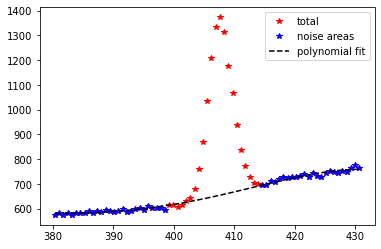

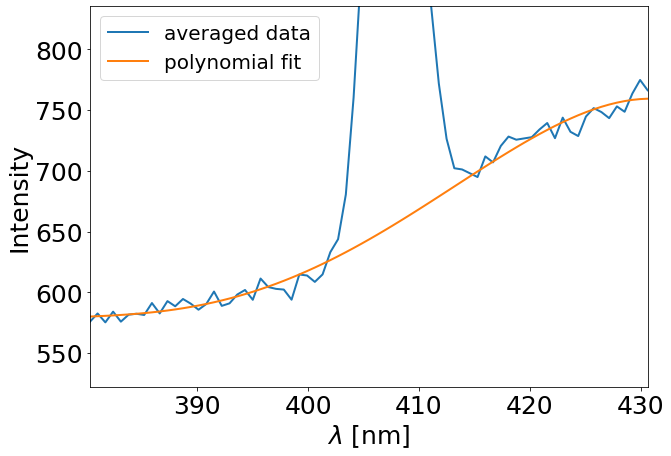

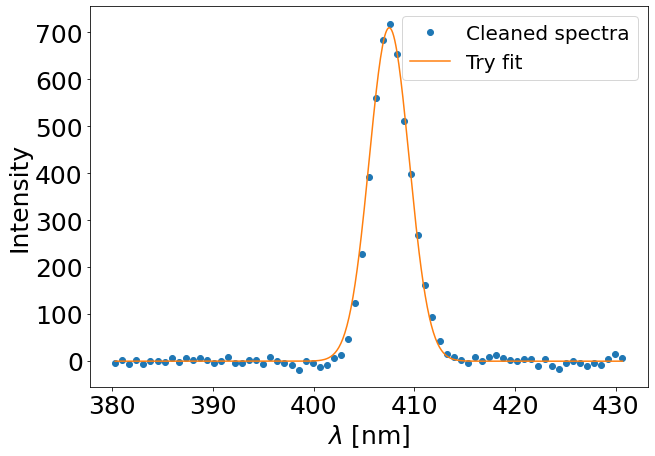

In [8]:
# To check how the noise is removed:
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.3, 1.3]

L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra=False, figure_counter=1)

l_cut = [380, 399, 414, 431]
order_fit_noise = 4

L_x_cleaned, L_y_cleaned, L_y_noise_fit, x_cut, figure_counter = alpaga.remove_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, return_fit_noise=True, return_boundary=True, show_spectra='all', figure_counter=1)

plt.figure(figure_counter, figsize=(10, 7))
plt.plot(L_lambda, L_spectra, label='averaged data', lw=2)
plt.plot(L_x_cleaned, L_y_noise_fit, label='polynomial fit', lw=2)
plt.xlabel(r'$\lambda$ [nm]', fontsize=25)
plt.xlim([L_x_cleaned[0], L_x_cleaned[-1]])
plt.ylim([np.min(L_y_noise_fit)*0.9, np.max(L_y_noise_fit)*1.1])
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)


print('To get the position of the area, use: x_cut ', x_cut)
print('Check the target and the valued used. Used:', L_lambda[x_cut[0]],  'target (l_cut):', l_cut[0])
print('Check the target and the valued used. Used:', L_lambda[x_cut[1]],  'target (l_cut):', l_cut[1])
print('Check the target and the valued used. Used:', L_lambda[x_cut[2]],  'target (l_cut):', l_cut[2])
print('Check the target and the valued used. Used:', L_lambda[x_cut[3]],  'target (l_cut):', l_cut[3])

# humain fit: try out!
intensity = 710
lambda_0 = 407.5
omega = 2.8

L_x_for_fit = np.linspace(L_x_cleaned[0], L_x_cleaned[-1], 500)

figure_counter += 1
plt.figure(figure_counter, figsize=(10, 7))
plt.plot(L_x_cleaned, L_y_cleaned, 'o', label='Cleaned spectra', lw=2)
plt.plot(L_x_for_fit, alpaga.fit_gausse(L_x_for_fit, intensity, lambda_0, omega), label='Try fit', lw=1.5)

plt.xlabel(r'$\lambda$ [nm]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)


I will look at file with the extention .dat in the directory C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_Vfor angle dependent values. The type of the files should be: prefix_angle_iter.extention
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_1.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_2.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_3.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_4.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_5.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_6.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_7.dat
C:\Users\Fabien\anaconda3\lib\site-packages\Alpaga\Data_tutorial\Eau_polar_V\Spectre_4.0_8.dat
C:\Users\Fabie

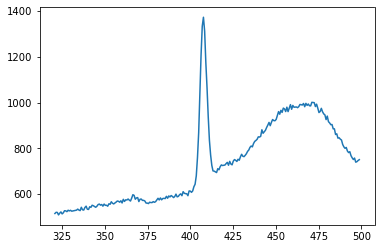

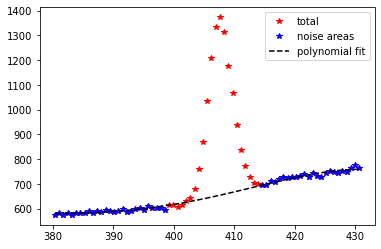

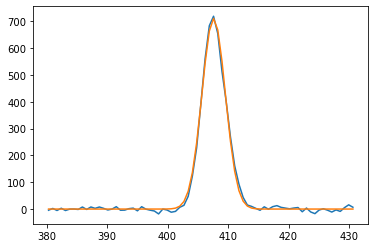

In [9]:
# The noise + gaussian fit
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
prefix_file, L_files_angles, N_iter, extention = alpaga.find_angle_iter_from_dir(directory)

names = os.path.join(directory, prefix_file) + '_' + L_files_angles[0]

L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.3, 1.3]

L_lambda, L_spectra, _ = alpaga.averaging_and_cleaning(names, N_iter, extention='.dat', type_cleaning='mean', L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, show_spectra=False, figure_counter=1)

l_cut = [380, 399, 414, 431]
order_fit_noise = 4

intensity, lambda_0, omega, figure_counter = alpaga.fit_gaussian_from_noise(L_lambda, L_spectra, l_cut=l_cut, order_fit_noise=order_fit_noise, bounds_fit_gausse=([0, 395, 1], [np.inf, 410, 25]), show_spectra='all')
print(intensity, lambda_0, omega)


# Polarisation intensity:

In [ ]:
# automatic case:  
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
prefix_file = False
L_files_angles = False 
N_iter = False


#For Windows Users: if the upper definition do not work, you have to 
#define the prefixe_file, L_files_angles and N_iter by yourself. See below an example: 

#directory = False
#prefix_file = 'Spectre'
#prefix_file = os.path.join(directory, prefix_file)
#L_files_angles = [str(float(x*4)) for x in range(1,48)] # list string for angles
#N_iter =12 

extention = '.dat'

# If working with the 3rd floor setup, change this function for the appropriate one, i.e. alpaga.third_floor_file_name_builder
fct_name = alpaga.standard_file_name # For nanoptec and underground
# fct_name = alpaga.third_floor_file_name_builder # For 3rd floor

In [ ]:
# Cleaning parameters:
type_cleaning='mean' # default
L_mean_cleaning_n = [1, 1, 1, 3]
L_mean_cleaning_evo_max = [2, 1.5, 1.4, 1.3] 

In [ ]:
# Noise 
l_cut = [380, 399, 414, 431] # remember that you still need to define meaningfull l_cut parameter even if you use the automatic_l_cut method!!!
order_fit_noise = 4

automatic_l_cut = True
l_cut_n_n2 = [2, 9]


In [ ]:
# Fit the gaussian parameters:
bounds_fit_gausse=([0, 404, 1], [np.inf, 410, 3])
lambda_0_ref = 407.7 # useless if you use method_fit_first='fit_gauss'
waist_ref = 2.52

method_fit_first='fit_gauss' # 'integral_gauss' or 'fit_gauss'

fixed_para_gauss_fit = True
method_fit_second = 'both' # or integral_gauss' or 'fit_gauss' or 'both'


In [ ]:
# Saving the results:
save_result=True
name_save_result = os.path.join(directory, 'post_prod_results.p')
print(name_save_result)

In [ ]:
waiting_time = False # False or a float

L_post_prod_gauss_fit_integral = alpaga.polarisation_intensity(directory=directory, prefix_file=prefix_file, L_files_angles=L_files_angles, N_iter=N_iter, extention=extention, fct_name=fct_name, type_cleaning=type_cleaning, L_mean_cleaning_n=L_mean_cleaning_n, L_mean_cleaning_evo_max=L_mean_cleaning_evo_max, automatic_l_cut=automatic_l_cut, l_cut=l_cut, l_cut_n_n2=l_cut_n_n2, order_fit_noise=order_fit_noise, method_fit_first=method_fit_first, bounds_fit_gausse=bounds_fit_gausse, lambda_0_ref=lambda_0_ref, waist_ref=waist_ref, fixed_para_gauss_fit=fixed_para_gauss_fit, method_fit_second=method_fit_second, save_result=save_result, name_save_result=name_save_result, waiting_time=waiting_time)

# Load results and plot:

In [4]:
directory = os.path.join(WORK_DIR, 'Eau_polar_V')
name_save_result = os.path.join(directory, 'post_prod_results.p')

print(name_save_result)

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2

L_intensity_angle = L_post_prod_load['L_intensity_angle']
L_lambda_0_angle = L_post_prod_load['L_lambda_0_angle']
L_waist_angle = L_post_prod_load['L_waist_angle']
L_intensity_angle_fit_gauss_fixed_para = L_post_prod_load['L_intensity_angle_fit_gauss_fixed_para']
L_intensity_angle_integral_gauss_fixed_para = L_post_prod_load['L_intensity_angle_integral_gauss_fixed_para']




/Users\Fabien/anaconda3\lib\site-packages\Alpaga\Data_tutorial/Eau_polar_V/post_prod_results.p


FileNotFoundError: [Errno 2] No such file or directory: '/Users\\Fabien/anaconda3\\lib\\site-packages\\Alpaga\\Data_tutorial/Eau_polar_V/post_prod_results.p'

In [ ]:
plt.figure(1, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity_angle, label='free')
plt.plot(L_polarisation_angle, L_intensity_angle_fit_gauss_fixed_para, label='fixed fit method')
plt.plot(L_polarisation_angle, L_intensity_angle_integral_gauss_fixed_para, label='fixed integral method')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=25)

In [ ]:
plt.figure(2, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_lambda_0_angle)
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'$\lambda_0$', fontsize=25)
plt.yticks(fontsize=25)
plt.title(r'$\lambda_0$ fit parameter found for every polarisation angle', fontsize=25)


In [ ]:
plt.figure(3, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_waist_angle)
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'$\omega$', fontsize=25)
plt.yticks(fontsize=25)
plt.title(r'$\omega_0$ fit parameter found for every polarisation angle', fontsize=25)


# Polarization analysis

In [ ]:
L_x = L_polarisation_angle
T = 1 # Acquisition time if you want to renormalize
L_y = L_intensity_angle/T # chose which method you want to have the intensity

a, b, c, alpha_0 , Zeta, Depol, i0, i2, i4 = alpaga.analyse_polarization_HRS(L_x, L_y)
# If you want to set alpha_0 to a given value: 
# a, b, c, alpha_0 , Zeta, Depol, i0, i2, i4 = alpaga.analyse_polarization_HRS(L_x, L_y, alpha_0=42)

print('a=', a, 'b=' ,b, 'c=', c, 'alpha_0=', alpha_0)
print('Zeta = ' + str(Zeta), 'D = ' + str(Depol))
print('i0=', i0, 'i2/i0=', i2, 'i4/i0=', i4)



plt.figure(1, figsize=(10, 7))
plt.plot(L_x, L_y , 'o', label='data')
plt.plot(L_x, alpaga.fct_polar_abc(L_x, a, b, c, alpha_0), '--', label='fit')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
#plt.title(name_for_title, fontsize=25)




In [ ]:
plt.figure(2, figsize=(10, 7))
#plt.plot(L_x, L_y/i0 - 1 , 'o', label='y - 1')
plt.plot(L_x, L_y/i0 - (1+2*i2*np.cos(2*np.pi/180*(L_x-alpha_0))) , 'o', label='y - (1+2*i2)')
plt.plot(L_x, i4*np.cos(4*np.pi/180*(L_x-alpha_0)) , label='i4')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
#plt.title(name_for_title, fontsize=25)
